In [45]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from plasmapy.physics.dielectric import (cold_plasma_permittivity_SDP,
                                         cold_plasma_permittivity_LRP)
from plasmapy.physics import parameters
from sympy import *
import math
from astropy import constants as const
from scipy import optimize
import scipy.special as spl
species = ['e','p']
B = 1e-5 * u.T
n = [1e10*u.m**-3, 1e10*u.m**-3]
gyro_frequency = parameters.gyrofrequency(B,'e')
plasmafrequency = parameters.plasma_frequency(1e10*u.m**-3)
print(gyro_frequency)
print(plasmafrequency)
frequency_wave = 0.1 * gyro_frequency
L,R,P = cold_plasma_permittivity_LRP(B,species, n , frequency_wave)
print(L,R,P)

1758820.023602124 rad / s
5641460.227179414 rad / s
-93.09265850596047 114.75628088588974 -1028.382352590448


In [46]:
k_wave = symbols('k')

k_unit = (u.rad/u.m)*const.c/frequency_wave 
# 
nn = k_wave * k_unit 

# nn is refraction index n = kc/omega
print(nn)

1704.50901159298*k


In [47]:
def dispersion_order0(L,R,P,nn,theta):
    theta_rad = theta *np.pi/180
    
    m_11 = 2*(R - nn**2 +0.5*nn**2*(math.sin(theta_rad))**2)   
    m_12 = nn**2 *math.sin(theta_rad)**2
    m_13 = nn**2 *math.cos(theta_rad)*math.sin(theta_rad)
    m_21 = m_12
    m_22 = 2*(L - nn**2 +0.5*nn**2*(math.sin(theta_rad))**2)
    m_23 = m_13
    m_31 = m_13
    m_32 = m_13
    m_33 = P - nn**2 *(math.sin(theta_rad)**2)
    
    D_0 = Matrix([[m_11,m_12,m_13],[m_21,m_22,m_23],[m_31,m_32,m_33]])
    return D_0
    
    

    
            
                       

In [48]:
D_0 = dispersion_order0(L.value,R.value,P.value,nn,30)
print(D_0.det())

2.29914883571303e+18*k**6 - 1582699549195.52*k**4*(229.512561771779 - 5084364.19855294*k**2) - 1582699549195.52*k**4*(-5084364.19855294*k**2 - 186.185317011921) - 527566516398.508*k**4*(-726337.74265042*k**2 - 1028.38235259045) + (229.512561771779 - 5084364.19855294*k**2)*(-5084364.19855294*k**2 - 186.185317011921)*(-726337.74265042*k**2 - 1028.38235259045)


In [49]:
# Solve the det(D_0) = 0
print(simplify(D_0.det()))
kk = solve(simplify(D_0.det()))
nn_solve = kk* k_unit

print(nn_solve*nn_solve)


-2.59504925591961e+16*k**4 + 257581652200.596*k**2 + 43944700.0465386
[134.843561193262 134.843561193262 -106.005376271605 -106.005376271605]


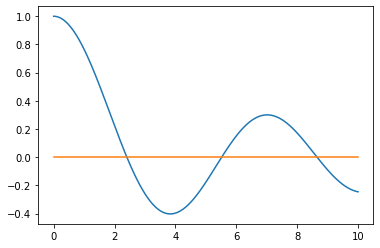

In [55]:
# test for Bessel
x = np.linspace(0,10,500)
y_0 = spl.jv(0,x)
y_3 = spl.jv(10,x)
plt.plot(x,y_0,x,y_3,'-')
plt.show()



In [ ]:
# test the range of k_parall